In [1]:
import sys
sys.path.append("../.")

import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split

from tokenizer import Tokenizer
from vocab import Vocabulary
from global_attention.predict import Predictor
from global_attention.model import Seq2Seq
from data import NMTDataset

# Set random seed
torch.random.manual_seed(47)

# NMT Evaluation

This notebook is to evaluate some of the pretrained Seq2Seq models.

## Data loading

In [2]:
dataset = NMTDataset("../dataset/fra.txt")

print(dataset)

NMTDataset(
  filepath=../dataset/fra.txt,
  src_lang=English,
  tar_lang=French,
  src_transform=None,
  tar_transform=None
)


During the training the dataset 10% was left out for testing.

In [3]:
test_split = 0.1

test_size = int(len(dataset) * test_split)
train_size = len(dataset) - test_size

train_subset, test_subset = random_split(dataset, lengths=[train_size, test_size])

## Prediction

Load the vocabulary

In [4]:
src_vocab = Vocabulary.from_file("../dataset/eng_vocab.txt")
tar_vocab = Vocabulary.from_file("../dataset/fra_vocab.txt")

Load the model

In [6]:
model = Seq2Seq.load("/home/bane/code/Attention/global_attention/trained_models6/seq2seq_ep:30-loss:5.7481-score:0.1458.pt")

Initialize the predictor

In [7]:
predictor = Predictor(model, Tokenizer(end_token=src_vocab.end_token), src_vocab, tar_vocab)

Try some translation from **train** data

In [8]:
def translate(src_sentence, tar_sentence):
    t = predictor(src_sentence)
    print(f"> {src_sentence}")
    print(f"= {tar_sentence}")
    print(f"< {t}")
    
    return t

\> Sentence for translation  
= Correct translation  
< Predicted translation  

Data point idx: 139002
> Be on your guard against pickpockets.
= Soyez attentifs aux voleurs à la tire.
< je suis.


AttributeError: 'AxesImage' object has no property 'xticklabels'

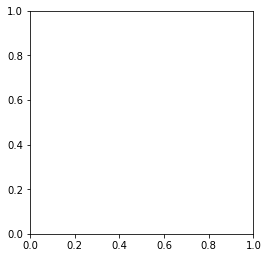

In [10]:
import random

i = random.randint(0, len(train_subset))
print(f"Data point idx: {i}")
t = translate(*train_subset[i])
ax = t.plot_attention()